In [13]:
import json
import openai
from time import sleep
from openai import OpenAI
import pandas as pd


In [14]:
client = OpenAI(api_key=("sk-proj")) 


In [24]:

def verify(text):
    messages = [
        {
            "role": "system",
            "content": """
شما یک خبره در اعتبارسنجی دلایل ارتباط بین یک پست و خبر هستید . موارد زیر دلایل رد شدن یا عدم ارتباط یک پست با خبر میباشند. برچسب آنها نشان دهنده درست بودن یا غلط بودن آن علت است.
میخواهم با دریافت متن علت، آن را اعتبار سنجی کنی.
اگر علت صحیح بود فقط بنویس بله
اگر علت غلط بود فقط بنویس خیر

مثال:
علت ذکر شده برای تایید نشدن پست از سوی خبر: خبر فقط به دیدار هوگو شورتر با ۲ متهم امنیتی اشاره کرده است و هیچ اطلاعاتی درباره حضور مسئولان دادسرای کرمان ارائه نمی‌دهد.
صحت سنجی: خیر – چون خلاف این بوده و در متن خبر با اسامی مسئولان به ان اشاره شده است

علت ذکر شده برای تایید نشدن پست از سوی خبر: خبر به وضوح تاریخ دیدار را اشتباه اعلام کرده و به تاریخ هفتم اسفندماه اشاره دارد در حالی که پست به تاریخ هفتم مهرماه اشاره می‌کند. این تناقض در تاریخ به وضوح نشان می‌دهد که یکی از دو محتوا نادرست است.
صحت سنجی: خیر -  چون در پست و خبر هردو به تاریخ 7 مهر اشاره شده است.

علت ذکر شده برای تایید نشدن پست از سوی خبر: خبر به وضوح و به طور کامل ادعای مطرح شده در پست را رد می‌کند، زیرا تعداد کشته‌ها و مصدومان در خبر (3 کشته و 5 مصدوم) با ادعای پست (8 کشته و زخمی) تناقض دارد.
صحت سنجی: خیر – هر دو به یک مفهوم اشاره میکنند.

علت ذکر شده برای نامربوطی  پست و خبر: خبر به موضوع خرید OpenAI و مخالفت آلتمن با آن پرداخته است، اما پست صحبت از خرید توییتر و شوخی آلتمن دارد که به طور مستقیم به موضوع خرید OpenAI و اعتراض او مربوط نمی‌شود.
صحت سنجی:خیر- چون در خبر و پست هردو موارد مرتبط با هم ذکر شده است و این علت برای نامربوطی ذکر شده است. درصورتی که خبر پست را رد میکند و علت رد کردن آن محتوای خبر است.

علت ذکر شده برای تایید نشدن پست از سوی خبر: پست به روز دوشنبه اشاره میکند در صورتی که خبر گفته است در تاریخ x این اتفاق افتاده است.
صحت سنجی: خیر- دوشنبه همان تاریخ x است ک مدل توانایی تشخیص انرا نداشته.
درحالت کلی خطاها ممکن است از جنس عدم تطابق اعداد و کلیده واژه ها در خبر و پست باشد . و کلا به اشتباه تشخیص داده شده باشند.

            """
        },
        {"role": "user", "content": f"متن علت: {text}"},
    ]
    while True:
        try:
            response = client.chat.completions.create(
                model="gpt-4o-mini",
                messages=messages
            )
            return response.choices[0].message.content
        except Exception as e:
            print(f"Error: {e}. Retrying in 5 seconds...")
            sleep(5)


In [25]:
df = pd.read_csv('test.csv' , encoding = 'utf-8')
# اجرای پرامپت برای هر ردیف و ذخیره نتیجه در یک ستون جدید
def process_row(row):
    print(f"در حال پردازش ردیف {row.name + 1} از {len(df)}...")
    result = verify(row['text'])
    print(f"نتیجه ردیف {row.name + 1}: {result}")
    return result

df['gpt-4o-mini'] = df.apply(process_row, axis=1)  # پردازش هر ردیف و ذخیره نتیجه


در حال پردازش ردیف 1 از 250...
نتیجه ردیف 1: خیر
در حال پردازش ردیف 2 از 250...
نتیجه ردیف 2: خیر
در حال پردازش ردیف 3 از 250...
نتیجه ردیف 3: خیر
در حال پردازش ردیف 4 از 250...
نتیجه ردیف 4: صحت سنجی: خیر - چون در خبر و پست هردو به تاریخ 8 اسفند اشاره شده است و این به اشتباه تشخیص داده شده است.
در حال پردازش ردیف 5 از 250...
نتیجه ردیف 5: خیر
در حال پردازش ردیف 6 از 250...
نتیجه ردیف 6: خیر
در حال پردازش ردیف 7 از 250...
نتیجه ردیف 7: بله
در حال پردازش ردیف 8 از 250...
نتیجه ردیف 8: بله
در حال پردازش ردیف 9 از 250...
نتیجه ردیف 9: بله
در حال پردازش ردیف 10 از 250...
نتیجه ردیف 10: خیر
در حال پردازش ردیف 11 از 250...
نتیجه ردیف 11: خیر
در حال پردازش ردیف 12 از 250...
نتیجه ردیف 12: خیر
در حال پردازش ردیف 13 از 250...
نتیجه ردیف 13: بله
در حال پردازش ردیف 14 از 250...
نتیجه ردیف 14: بله
در حال پردازش ردیف 15 از 250...
نتیجه ردیف 15: خیر
در حال پردازش ردیف 16 از 250...
نتیجه ردیف 16: صحبت سنجی: خیر – چون هر دو موضوع شهادت و پیام‌های تسلیت و تقدیر را در بر می‌گیرند و می‌توانند فرهنگی مرتب

In [26]:

# ذخیره نتایج به فایل جدید CSV
df.to_csv('output_gpt4omini.csv', index=False)

print("نتایج ذخیره شد.")

نتایج ذخیره شد.


In [27]:
import pandas as pd

# Read CSV with encoding that supports Persian (UTF-8 is usually good)
df = pd.read_csv('output_gpt4omini.csv', encoding='utf-8')

# Save to Excel
df.to_excel('output_gpt4ominitest.xlsx', index=False)


In [28]:
import pandas as pd

# مسیر فایل Excel خود را وارد کنید
file_path = 'output_gpt4ominitest.xlsx'  # مطمئن شو این فایل واقعاً وجود داره
df = pd.read_excel(file_path)

# تابعی برای بررسی اولین کلمه و اختصاص 0 یا 1
def check_first_word(row):
    first_word = row.split()[0].lower()
    return 1 if first_word == 'بله' else 0 if first_word == 'خیر' else None

# اعمال تابع بر روی ستون 'gpt' (اگر نام ستون همینه)
df['llm-label'] = df['gpt-4o-mini'].apply(check_first_word)

# ذخیره فایل اصلاح شده به صورت Excel
df.to_excel('gpt4omini-modifiedtest.xlsx', index=False)

print("فایل با موفقیت اصلاح شد و در فایل 'lamma-modified' ذخیره شد.")


فایل با موفقیت اصلاح شد و در فایل 'lamma-modified' ذخیره شد.


In [29]:
import pandas as pd

# بارگذاری فایل Excel
file_path = 'gpt4omini-modifiedtest.xlsx'  # اینجا مسیر فایل Excel خود را وارد کن
df = pd.read_excel(file_path)

# شمارش برچسب‌ها در ستون 'label' و 'llm-label'
label_counts = df['label'].value_counts()
llm_label_counts = df['llm-label'].value_counts()

# نمایش نتایج
print("برچسب‌های موجود در ستون 'label':")
print(label_counts)
print("\nبرچسب‌های موجود در ستون 'llm-label':")
print(llm_label_counts)


برچسب‌های موجود در ستون 'label':
label
بله    150
خیر    100
Name: count, dtype: int64

برچسب‌های موجود در ستون 'llm-label':
llm-label
0.0    158
1.0     64
Name: count, dtype: int64


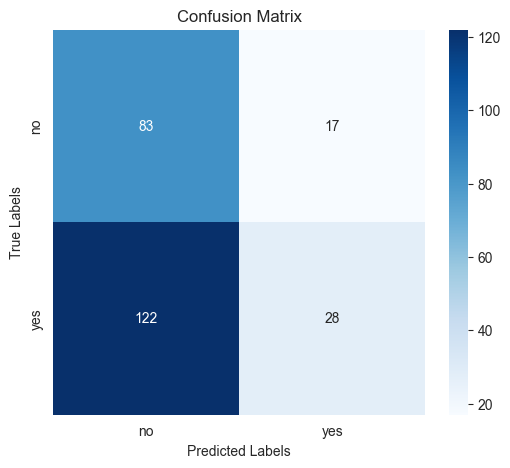

Accuracy: 0.444
Precision: 0.6222222222222222
Recall: 0.18666666666666668
F1 Score: 0.28717948717948716


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# بارگذاری فایل اکسل
file_path = 'lamma-modifiedtest.xlsx'  # مسیر فایل خود را اینجا وارد کن
df = pd.read_excel(file_path)
df = df.dropna(subset=["label"])
df = df.dropna(subset=["llm-label"])

# فرض می‌کنیم ستون‌های "label" و "llm-label" داریم
y_true = df['label'].map({'بله': 1, 'خیر': 0})  # تبدیل 'بله' به 1 و 'خیر' به 0
y_pred = df['llm-label']  # برچسب‌های مدل

# محاسبه کانفیوژن ماتریس
conf_matrix = confusion_matrix(y_true, y_pred)

# محاسبه دقت، صحت، ریکال و اف وان اسکور
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# نمایش کانفیوژن ماتریس به صورت گرافیکی
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# نمایش نتایج متریک‌ها
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


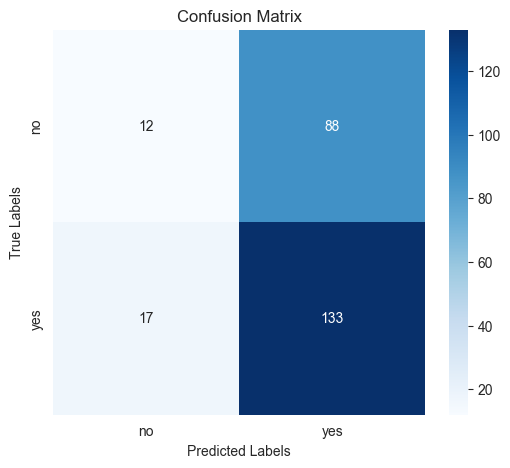

Accuracy: 0.58
Precision: 0.6018099547511312
Recall: 0.8866666666666667
F1 Score: 0.7169811320754716


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# بارگذاری فایل اکسل
file_path = 'gpt4o-modifiedtest.xlsx'  # مسیر فایل خود را اینجا وارد کن
df = pd.read_excel(file_path)
df = df.dropna(subset=["label"])
df = df.dropna(subset=["llm-label"])

# فرض می‌کنیم ستون‌های "label" و "llm-label" داریم
y_true = df['label'].map({'بله': 1, 'خیر': 0})  # تبدیل 'بله' به 1 و 'خیر' به 0
y_pred = df['llm-label']  # برچسب‌های مدل

# محاسبه کانفیوژن ماتریس
conf_matrix = confusion_matrix(y_true, y_pred)

# محاسبه دقت، صحت، ریکال و اف وان اسکور
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# نمایش کانفیوژن ماتریس به صورت گرافیکی
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# نمایش نتایج متریک‌ها
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


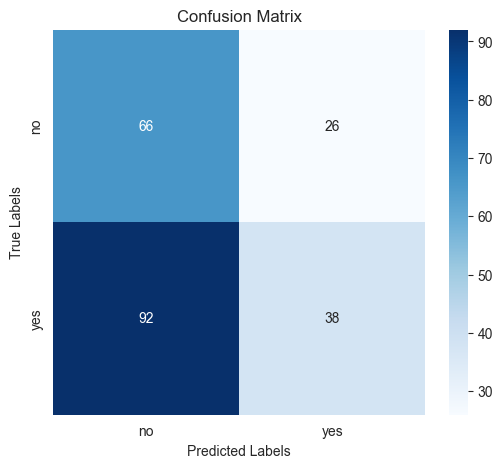

Accuracy: 0.46846846846846846
Precision: 0.59375
Recall: 0.2923076923076923
F1 Score: 0.3917525773195876


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# بارگذاری فایل اکسل
file_path = 'gpt4omini-modifiedtest.xlsx'  # مسیر فایل خود را اینجا وارد کن
df = pd.read_excel(file_path)
df = df.dropna(subset=["label"])
df = df.dropna(subset=["llm-label"])

# فرض می‌کنیم ستون‌های "label" و "llm-label" داریم
y_true = df['label'].map({'بله': 1, 'خیر': 0})  # تبدیل 'بله' به 1 و 'خیر' به 0
y_pred = df['llm-label']  # برچسب‌های مدل

# محاسبه کانفیوژن ماتریس
conf_matrix = confusion_matrix(y_true, y_pred)

# محاسبه دقت، صحت، ریکال و اف وان اسکور
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# نمایش کانفیوژن ماتریس به صورت گرافیکی
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# نمایش نتایج متریک‌ها
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


In [6]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 📂 مسیر فایل اکسل خود را اینجا وارد کن:
file_path = 'claim8000_final.xlsx'

# 🟡 خواندن داده از فایل اکسل
df = pd.read_excel(file_path)

# 🟢 اطمینان از اینکه ستون‌ها رشته (string) هستند
df['برچسب نهایی'] = df['برچسب نهایی'].astype(str).str.strip()
df['برچسب'] = df['برچسب'].astype(str).str.strip()

# 🔵 محاسبه معیارهای ارزیابی
y_true = df['برچسب نهایی']
y_pred = df['برچسب']

# 🔍 نمایش گزارش کامل دسته‌بندی
print("📊 گزارش عملکرد مدل LLM:")
print(classification_report(y_true, y_pred, digits=4))

# 🎯 نمایش دقیق‌تر مقادیر کلیدی
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='macro')
rec = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"\n✅ Accuracy: {acc:.4f}")
print(f"✅ Precision (macro avg): {prec:.4f}")
print(f"✅ Recall (macro avg): {rec:.4f}")
print(f"✅ F1 Score (macro avg): {f1:.4f}")


📊 گزارش عملکرد مدل LLM:
              precision    recall  f1-score   support

         بله     0.8195    0.9737    0.8900      6055
         خیر     0.7645    0.3845    0.5116      1917
     نامربوط     0.5757    0.3564    0.4403       491

    accuracy                         0.8044      8463
   macro avg     0.7199    0.5715    0.6139      8463
weighted avg     0.7929    0.8044    0.7782      8463


✅ Accuracy: 0.8044
✅ Precision (macro avg): 0.7199
✅ Recall (macro avg): 0.5715
✅ F1 Score (macro avg): 0.6139


📋 Classification Report:
              precision    recall  f1-score   support

         بله     0.8137    0.9708    0.8853      1817
         خیر     0.7852    0.3878    0.5192       575
     نامربوط     0.6092    0.3605    0.4530       147

    accuracy                         0.8035      2539
   macro avg     0.7360    0.5731    0.6192      2539
weighted avg     0.7954    0.8035    0.7774      2539


✅ Accuracy: 0.8035
✅ Precision (macro avg): 0.7360
✅ Recall (macro avg): 0.5731
✅ F1 Score (macro avg): 0.6192


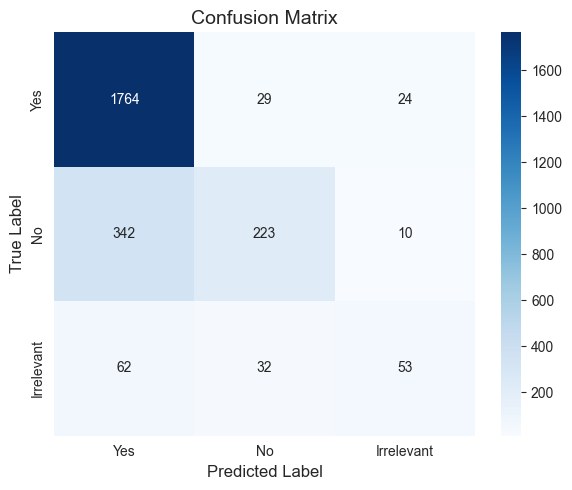

In [1]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 مسیر فایل اکسل خودت را اینجا وارد کن    
file_path = 'test_stance_data2.xlsx'

# 🟡 خواندن فایل اکسل
df = pd.read_excel(file_path)

# 🧹 پاکسازی مقادیر و اطمینان از نوع داده‌ها
df['برچسب نهایی'] = df['برچسب نهایی'].astype(str).str.strip()
df['برچسب'] = df['برچسب'].astype(str).str.strip()

# 🎯 تعریف متغیرهای واقعی و پیش‌بینی‌شده
y_true = df['برچسب نهایی']
y_pred = df['برچسب']

# 📊 گزارش دسته‌بندی کامل
print("📋 Classification Report:")
print(classification_report(y_true, y_pred, digits=4))

# 📈 متریک‌های اصلی
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='macro')
rec = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"\n✅ Accuracy: {acc:.4f}")
print(f"✅ Precision (macro avg): {prec:.4f}")
print(f"✅ Recall (macro avg): {rec:.4f}")
print(f"✅ F1 Score (macro avg): {f1:.4f}")

# 📉 Confusion Matrix
cm = confusion_matrix(y_true, y_pred, labels=["بله", "خیر", "نامربوط"])
labels_display = ["Yes", "No", "Irrelevant"]

# 🎨 رسم کانفیوژن ماتریس
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels_display,
            yticklabels=labels_display)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.tight_layout()

# 💾 اگر خواستی تصویر را ذخیره کنی:
# plt.savefig("confusion_matrix.png", dpi=300)

plt.show()


📋 Classification Report:
              precision    recall  f1-score   support

         بله     0.8060    0.9077    0.8538      1744
         خیر     0.4490    0.3558    0.3970       520
     نامربوط     0.2500    0.0167    0.0312       120

    accuracy                         0.7424      2384
   macro avg     0.5017    0.4267    0.4274      2384
weighted avg     0.7002    0.7424    0.7128      2384


✅ Accuracy: 0.7424
✅ Precision (macro avg): 0.5017
✅ Recall (macro avg): 0.4267
✅ F1 Score (macro avg): 0.4274


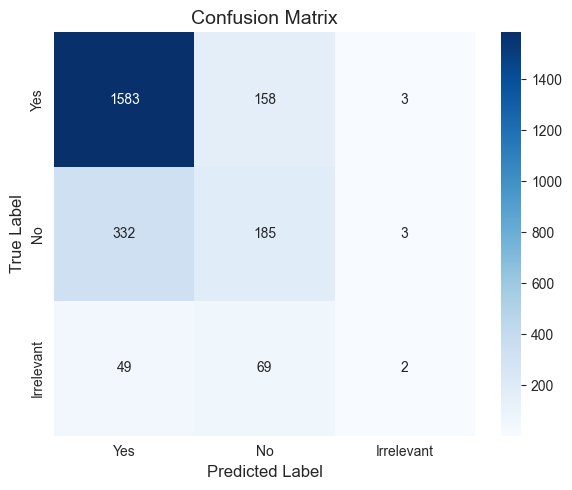

In [13]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 مسیر فایل اکسل خودت را اینجا وارد کن
file_path = 'test_stance_data2lama_final.xlsx'

# 🟡 خواندن فایل اکسل
df = pd.read_excel(file_path)

# 🧹 پاکسازی مقادیر و اطمینان از نوع داده‌ها
df['برچسب نهایی'] = df['برچسب نهایی'].astype(str).str.strip()
df['فاینال لاما'] = df['فاینال لاما'].astype(str).str.strip()

# 🎯 تعریف متغیرهای واقعی و پیش‌بینی‌شده
y_true = df['برچسب نهایی']
y_pred = df['فاینال لاما']

# 📊 گزارش دسته‌بندی کامل
print("📋 Classification Report:")
print(classification_report(y_true, y_pred, digits=4))

# 📈 متریک‌های اصلی
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='macro')
rec = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"\n✅ Accuracy: {acc:.4f}")
print(f"✅ Precision (macro avg): {prec:.4f}")
print(f"✅ Recall (macro avg): {rec:.4f}")
print(f"✅ F1 Score (macro avg): {f1:.4f}")

# 📉 Confusion Matrix
cm = confusion_matrix(y_true, y_pred, labels=["بله", "خیر", "نامربوط"])
labels_display = ["Yes", "No", "Irrelevant"]

# 🎨 رسم کانفیوژن ماتریس
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels_display,
            yticklabels=labels_display)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.tight_layout()

# 💾 اگر خواستی تصویر را ذخیره کنی:
# plt.savefig("confusion_matrix.png", dpi=300)

plt.show()


📋 Classification Report:
              precision    recall  f1-score   support

         بله     0.8102    0.9110    0.8577      5811
         خیر     0.4706    0.3685    0.4133      1737
     نامربوط     0.3077    0.0215    0.0402       372

    accuracy                         0.7503      7920
   macro avg     0.5295    0.4337    0.4371      7920
weighted avg     0.7121    0.7503    0.7218      7920

✅ Accuracy: 0.7503
✅ Precision (macro avg): 0.5295
✅ Recall (macro avg): 0.4337
✅ F1 Score (macro avg): 0.4371


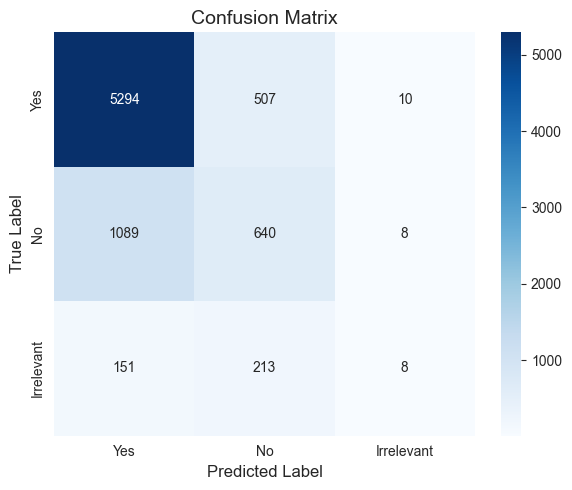

In [14]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 مسیر فایل اکسل خودت را اینجا وارد کن
file_path = 'claim8000_final_lama_cleaned.xlsx'

# 🟡 خواندن فایل اکسل
df = pd.read_excel(file_path)

# 🧹 پاکسازی مقادیر و اطمینان از نوع داده‌ها
df['برچسب نهایی'] = df['برچسب نهایی'].astype(str).str.strip()
df['فاینال لاما'] = df['فاینال لاما'].astype(str).str.strip()

# 🎯 تعریف متغیرهای واقعی و پیش‌بینی‌شده
y_true = df['برچسب نهایی']
y_pred = df['فاینال لاما']

# 📊 گزارش دسته‌بندی کامل
print("📋 Classification Report:")
print(classification_report(y_true, y_pred, digits=4))

# 📈 متریک‌های اصلی
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='macro')
rec = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"\n✅ Accuracy: {acc:.4f}")
print(f"✅ Precision (macro avg): {prec:.4f}")
print(f"✅ Recall (macro avg): {rec:.4f}")
print(f"✅ F1 Score (macro avg): {f1:.4f}")

# 📉 Confusion Matrix
cm = confusion_matrix(y_true, y_pred, labels=["بله", "خیر", "نامربوط"])
labels_display = ["Yes", "No", "Irrelevant"]

# 🎨 رسم کانفیوژن ماتریس
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels_display,
            yticklabels=labels_display)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.tight_layout()

# 💾 اگر خواستی تصویر را ذخیره کنی:
# plt.savefig("confusion_matrix.png", dpi=300)

plt.show()


📋 Classification Report:
              precision    recall  f1-score   support

         بله     0.7375    0.7885    0.7622      1012
         خیر     0.3714    0.0802    0.1320       324
     نامربوط     0.0642    0.2099    0.0983        81

    accuracy                         0.5935      1417
   macro avg     0.3910    0.3596    0.3308      1417
weighted avg     0.6153    0.5935    0.5801      1417


✅ Accuracy: 0.5935
✅ Precision (macro avg): 0.3910
✅ Recall (macro avg): 0.3596
✅ F1 Score (macro avg): 0.3308


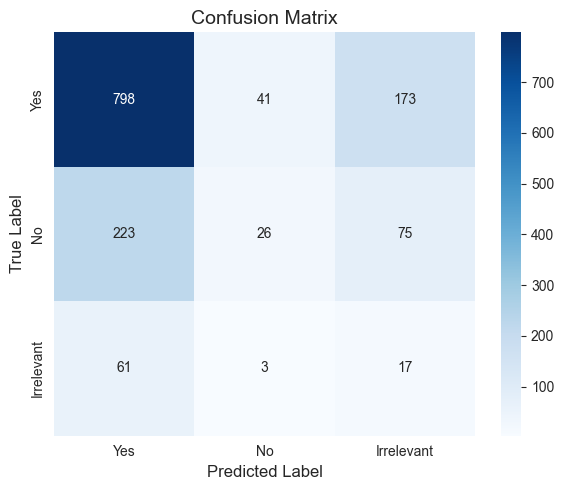

In [17]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 مسیر فایل اکسل خودت را اینجا وارد کن
file_path = 'cleaned_test_stance_data2deepseek.xlsx'

# 🟡 خواندن فایل اکسل
df = pd.read_excel(file_path)

# 🧹 پاکسازی مقادیر و اطمینان از نوع داده‌ها
df['برچسب نهایی'] = df['برچسب نهایی'].astype(str).str.strip()
df['deepseek'] = df['deepseek'].astype(str).str.strip()

# ✅ اصلاح برچسب‌های اشتباه در پیش‌بینی
df['deepseek'] = df['deepseek'].replace({
    '**خیر**': 'خیر',
    'خبر': 'خیر',
    'خبر:': 'خیر'
})

# 🎯 تعریف متغیرهای واقعی و پیش‌بینی‌شده
y_true = df['برچسب نهایی']
y_pred = df['deepseek']

# 📋 گزارش دسته‌بندی کامل
print("📋 Classification Report:")
print(classification_report(y_true, y_pred, digits=4))

# 📈 متریک‌های اصلی
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='macro')
rec = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"\n✅ Accuracy: {acc:.4f}")
print(f"✅ Precision (macro avg): {prec:.4f}")
print(f"✅ Recall (macro avg): {rec:.4f}")
print(f"✅ F1 Score (macro avg): {f1:.4f}")

# 📉 Confusion Matrix
cm = confusion_matrix(y_true, y_pred, labels=["بله", "خیر", "نامربوط"])
labels_display = ["Yes", "No", "Irrelevant"]

# 🎨 رسم کانفیوژن ماتریس
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels_display,
            yticklabels=labels_display)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.tight_layout()

# 💾 اگر خواستی تصویر را ذخیره کنی:
# plt.savefig("confusion_matrix.png", dpi=300)

plt.show()
